# **Online Retail Sales and Customer Data**

The dataset is in: https://www.kaggle.com/datasets/thedevastator/online-retail-sales-and-customer-data

The **InvoiceNo** column holds unique identifiers for each transaction conducted. This numerical code serves a twofold purpose: it facilitates effortless identification of individual sales or purchases while simultaneously enabling treasury management by offering a repository for record keeping.
In concordance with the invoice number is the **InvoiceDate** column. It provides a date-time stamp associated with every transaction, which can reveal patterns in purchasing behaviour over time and assists with record-keeping requirements.
The **StockCode** acts as an integral part of this dataset; it encompasses alphanumeric sequences allocated distinctively to every item in stock. Such a system aids unequivocally identifying individual products making inventory records seamless.
The **Description** field offers brief elucidations about each listed product, adding layers beyond just stock codes to aid potential customers' understanding of products better and make more informed choices.
Detailed logs concerning sold quantities come under the **Quantity** banner - it lists the units involved per transaction alongside aiding calculations regarding total costs incurred during each sale/purchase offering significant help tracking inventory levels based on products' outflow dynamics within given periods.
Retail isn't merely about what you sell but also at what price you sell- A point acknowledged via our inclusion of unit prices exerted on items sold within transactions inside our dataset's **UnitPrice** column which puts forth pertinent pricing details serving as pivotal factors driving metrics such as gross revenue calculation etc
Finally yet importantly is our dive into foreign waters - literally! With impressive international outreach we're looking into segmentation bases like geographical locations via documenting countries (under the name **Country**) where transactions are conducted & consumers reside extending opportunities for businesses to map their customer bases, track regional performance metrics, extend localization efforts and overall contributing to the formulation of efficient segmentation strategies.
All this invaluable information can be found in a sortable CSV file titled online_retail.csv. This dataset will prove incredibly advantageous for anyone interested in or researching online sales trends, developing customer profiles, or gaining insights into effective inventory management practices


### Description of the columns:
- **InvoiceNo:**	A unique identifier for each transaction. (Numeric)
- **StockCode:**	A unique alphanumeric code assigned to each product in the inventory. (Alphanumeric)
- **Description:**	A brief textual description of each product. (Text)
- **Quantity:**	The number of units of the product involved in the transaction. (Numeric)
- **InvoiceDate:**	The exact date and time when the transaction took place. (Date/Time)
- **UnitPrice:**	The price per unit of the product. (Numeric)
- **CustomerID:** A unique code to identify a customer (Numeric)
- **Country:**	The country where the purchaser resides. (Text)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
file_path_sales = '/content/drive/My Drive/Online_Retail_Sales_Customer_Data/online_retail.csv'
df_sales = pd.read_csv(file_path_sales)

# Exploratory Data Analysis

In [4]:
df_sales.head(10)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


The majority of my columns have object type


There are two columns that have NaN values:
- Description
- CustomerID

In [6]:
df_sales.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


There is a problem with Quantity and UnitPrice column, they have this min and max value:


| **Column**   | **Minimum Value** | **Maximum Value** |
|---------------|-------------------|--------------------|
| Quantity      | -80995.000000     | 80995.000000       |
| UnitPrice     | -11062.060000     | 38970.000000       |


In [7]:
df_sales.shape

(541909, 9)

# Cleaning up the dataset

### Description

In [8]:
NaN_description_unique = df_sales[df_sales['Description'].isnull()]['StockCode'].unique()

In [9]:
description_unique = df_sales[df_sales['Description'].notna()]['StockCode'].unique()
description_unique

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

In [10]:
for SC in NaN_description_unique:
    if SC in description_unique:
        description_mapping = df_sales.loc[df_sales['StockCode'] == SC, 'Description'].value_counts().idxmax()
        df_sales.loc[(df_sales['StockCode'] == SC) & (df_sales['Description'].isna()), 'Description'] = description_mapping
    else:
        df_sales.loc[df_sales['StockCode'] == SC, 'Description'] = 'UNKNOWN'

In [11]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  541909 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [12]:
df_sales = df_sales[(df_sales['Description'] != 'Manual') & (df_sales['Description'] != 'POSTAGE') & (df_sales['Description'] != 'Amazon') & (df_sales['Description'] != 'DOTCOM POSTAGE')]

In [13]:
# unique_values = df_sales['Description'].unique().tolist()
# unique_values

### CustomerID

There are three possible ways to handle NaN values in the CustomerID column, but each approach has its own drawbacks:

1. **Eliminate the entire column:** This could remove valuable information necessary for analyzing customer behavior, frequency of sales, or individual spending patterns.

2. **Delete the NaN values**

3. **Replace the NaN values with the value '00000.0'** to create a large group with these values: This approach retains most of the information from the CustomerID column, given that there are 135,080 NaN values. However, it is important to exercise caution during subsequent analysis of the dataset to avoid misinterpretation.

For this analysis I decided to delete the NaN values

In [14]:
df_sales = df_sales.dropna()

In [15]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405152 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        405152 non-null  int64  
 1   InvoiceNo    405152 non-null  object 
 2   StockCode    405152 non-null  object 
 3   Description  405152 non-null  object 
 4   Quantity     405152 non-null  int64  
 5   InvoiceDate  405152 non-null  object 
 6   UnitPrice    405152 non-null  float64
 7   CustomerID   405152 non-null  float64
 8   Country      405152 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 30.9+ MB


## Fix some columns

### Time and season

In [16]:
# Creation of Time features

df_sales["InvoiceDate"] = pd.to_datetime(df_sales["InvoiceDate"])
df_sales["Time"] = df_sales["InvoiceDate"].dt.time
df_sales["Day"] = df_sales["InvoiceDate"].dt.day
df_sales["Month"] = df_sales["InvoiceDate"].dt.month
df_sales["Year"] = df_sales["InvoiceDate"].dt.year
# # df_sales['Dayofweek'] = df_sales['InvoiceDate'].dt.dayofweek
# df_sales['Dayofyear'] = df_sales['InvoiceDate'].dt.dayofyear
# df_sales['Weekofyear'] = df_sales['InvoiceDate'].dt.isocalendar().week.astype(int)
df_sales

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Day,Month,Year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,1,12,2010
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,1,12,2010
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,1,12,2010
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,1,12,2010
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,1,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12:50:00,9,12,2011
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12:50:00,9,12,2011
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12:50:00,9,12,2011
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12:50:00,9,12,2011


In [17]:
df_sales['TotalSales'] = df_sales['Quantity'] * df_sales['UnitPrice']

- Spring: March, April, May (March 1st - May 31st)
- Summer: June, July, August (June 1st - August 31st)
- Autumn: September, October, November (September 1st - November 30th)
- Winter: December, January, February (December 1st - February 28th/29th)

In [18]:
def get_month(month):
  if month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  elif month in [9, 10, 11]:
    return 'Autumn'
  elif month in [12, 1, 2]:
    return 'Winter'
  else:
    return 'Unknown'

In [19]:
df_sales['Season'] = df_sales.Month.apply(get_month)
df_sales

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Day,Month,Year,TotalSales,Season
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,1,12,2010,15.30,Winter
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,1,12,2010,20.34,Winter
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,1,12,2010,22.00,Winter
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,1,12,2010,20.34,Winter
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,1,12,2010,20.34,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12:50:00,9,12,2011,10.20,Winter
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12:50:00,9,12,2011,12.60,Winter
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12:50:00,9,12,2011,16.60,Winter
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12:50:00,9,12,2011,16.60,Winter


### Quantity and UnitPrice

In [20]:
df_sales[df_sales['Quantity'] < 0]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Day,Month,Year,TotalSales,Season
141,141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,09:41:00,1,12,2010,-27.50,Winter
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,09:49:00,1,12,2010,-4.65,Winter
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,10:24:00,1,12,2010,-19.80,Winter
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,1,12,2010,-6.96,Winter
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,1,12,2010,-6.96,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540448,540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,09:57:00,9,12,2011,-23.40,Winter
540449,540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,09:57:00,9,12,2011,-9.13,Winter
541715,541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,11:57:00,9,12,2011,-54.75,Winter
541716,541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,11:58:00,9,12,2011,-1.25,Winter


In [21]:
df_sales = df_sales[df_sales['Quantity'] > 0]

In [22]:
df_sales[df_sales['UnitPrice'] < 0]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Day,Month,Year,TotalSales,Season


### Outliers

In [23]:
# Functions for the plot of the outlier
def box_and_scatter_plot(df, df_column):
    fig, axs = plt.subplots(1, 2, figsize = (10, 5))

    # Create a box plot in the first subplot
    sns.boxplot(x=df[df_column], ax = axs[0])
    axs[0].set_xlabel(df_column)
    axs[0].set_title('Box Plot of ' + df_column + ' to Identify Outliers')

    # Create a scatter plot in the second subplot
    sns.scatterplot(x = df.index, y = df[df_column], ax=axs[1])
    axs[1].set_xlabel('Index')
    axs[1].set_ylabel(df_column)
    axs[1].set_title('Scatter Plot of ' + df_column + ' to Identify Outliers')

    # Adjust the layout
    plt.tight_layout()

    # Show the plots
    plt.show()

#### Quantity

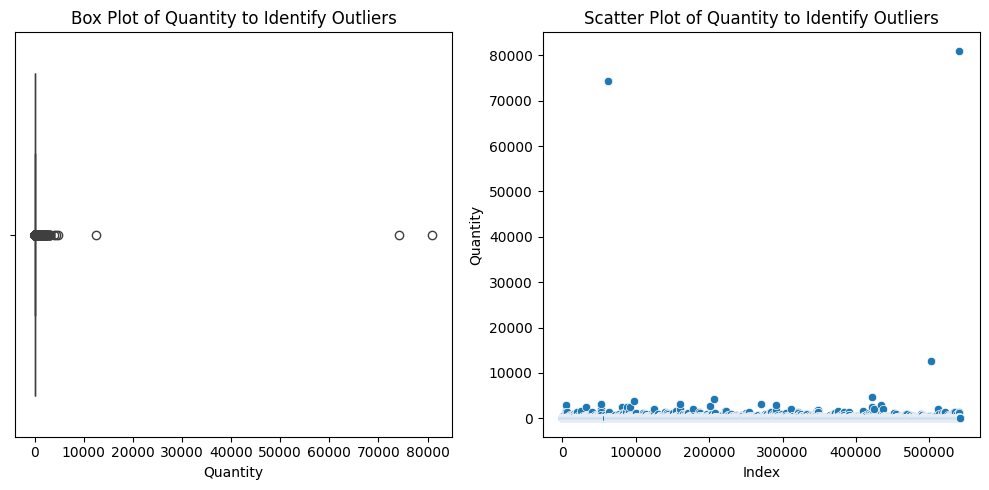

In [24]:
box_and_scatter_plot(df_sales, 'Quantity')

In [25]:
df_sales[df_sales['Quantity'] >= 10000]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Day,Month,Year,TotalSales,Season
61619,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,10:01:00,18,1,2011,77183.6,Winter
502122,502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,15:57:00,25,11,2011,0.0,Autumn
540421,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,09:15:00,9,12,2011,168469.6,Winter


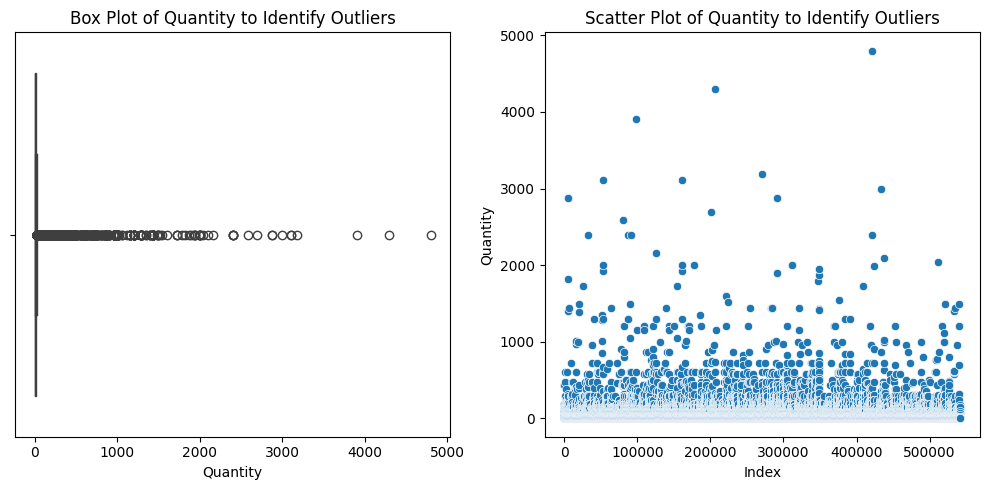

In [26]:
quantity_mask = df_sales['Quantity'] < 10000
df_sales = df_sales[quantity_mask]
box_and_scatter_plot(df_sales, 'Quantity')

#### UnitPrice

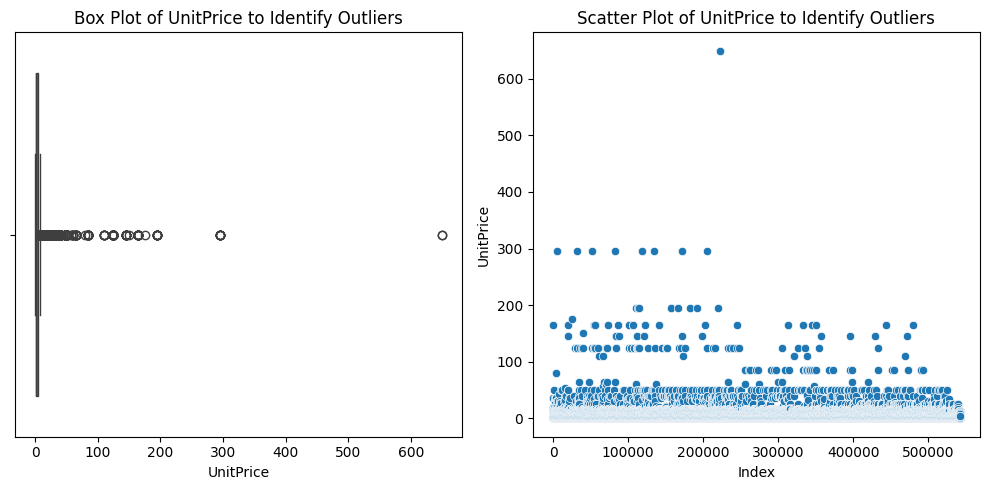

In [27]:
box_and_scatter_plot(df_sales, 'UnitPrice')

In [28]:
df_sales[df_sales['UnitPrice'] >= 250]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Day,Month,Year,TotalSales,Season
4989,4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-02 18:06:00,295.0,13145.0,United Kingdom,18:06:00,2,12,2010,295.0,Winter
32484,32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-16 08:41:00,295.0,16607.0,United Kingdom,08:41:00,16,12,2010,295.0,Winter
51636,51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,2011-01-10 14:57:00,295.0,17406.0,United Kingdom,14:57:00,10,1,2011,295.0,Winter
82768,82768,543253,22655,VINTAGE RED KITCHEN CABINET,1,2011-02-04 15:32:00,295.0,14842.0,United Kingdom,15:32:00,4,2,2011,295.0,Winter
118769,118769,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-03-14 11:38:00,295.0,13452.0,United Kingdom,11:38:00,14,3,2011,295.0,Spring
133994,133994,547814,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-03-25 14:19:00,295.0,13452.0,United Kingdom,14:19:00,25,3,2011,295.0,Spring
171178,171178,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-04-28 12:22:00,295.0,14973.0,United Kingdom,12:22:00,28,4,2011,295.0,Spring
205759,205759,554836,22655,VINTAGE RED KITCHEN CABINET,1,2011-05-26 16:25:00,295.0,13015.0,United Kingdom,16:25:00,26,5,2011,295.0,Spring
222680,222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098.0,United Kingdom,15:28:00,10,6,2011,38970.0,Summer
222682,222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.5,15098.0,United Kingdom,15:33:00,10,6,2011,649.5,Summer


# Plot

In [29]:
colors = ['#FFB6C1', '#FFDAB9', '#ADD8E6', '#98FB98', '#FFA07A', '#87CEFA', '#FF69B4', '#F0E68C', '#D3D3D3', '#B0C4DE']
# vector colors that I use in the plot

<ipython-input-30-2de99167bc6d>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


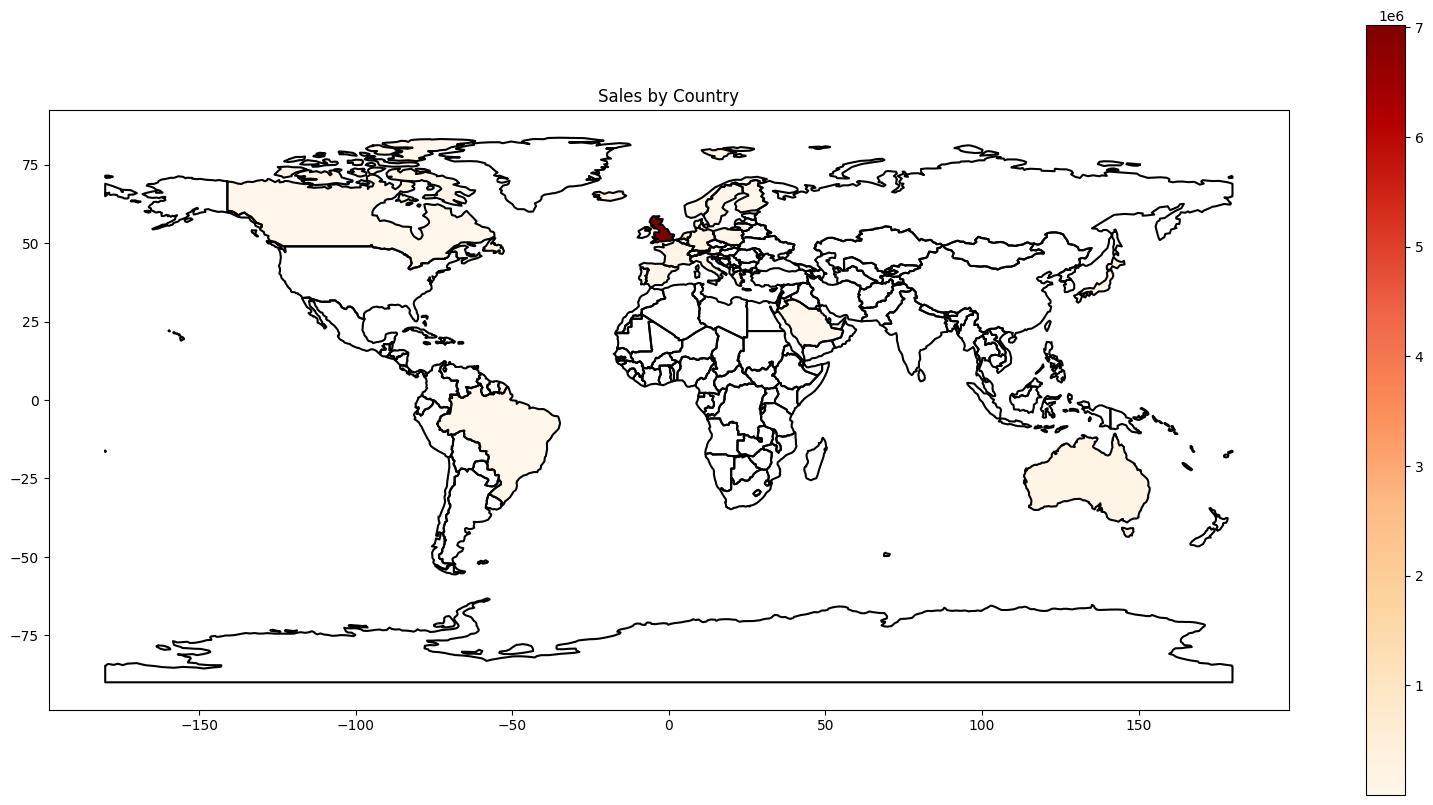

In [30]:
sales_in_the_world = df_sales.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(sales_in_the_world, how = 'left', left_on = 'name', right_on = 'Country')

# Contour plot of the world in black
world.boundary.plot(color = 'black', figsize = (20, 10))

# World map plot with sales data highlighted
world.plot(column = 'TotalSales', cmap = 'OrRd', legend = True, ax = plt.gca())

plt.title('Sales by Country')
plt.show()

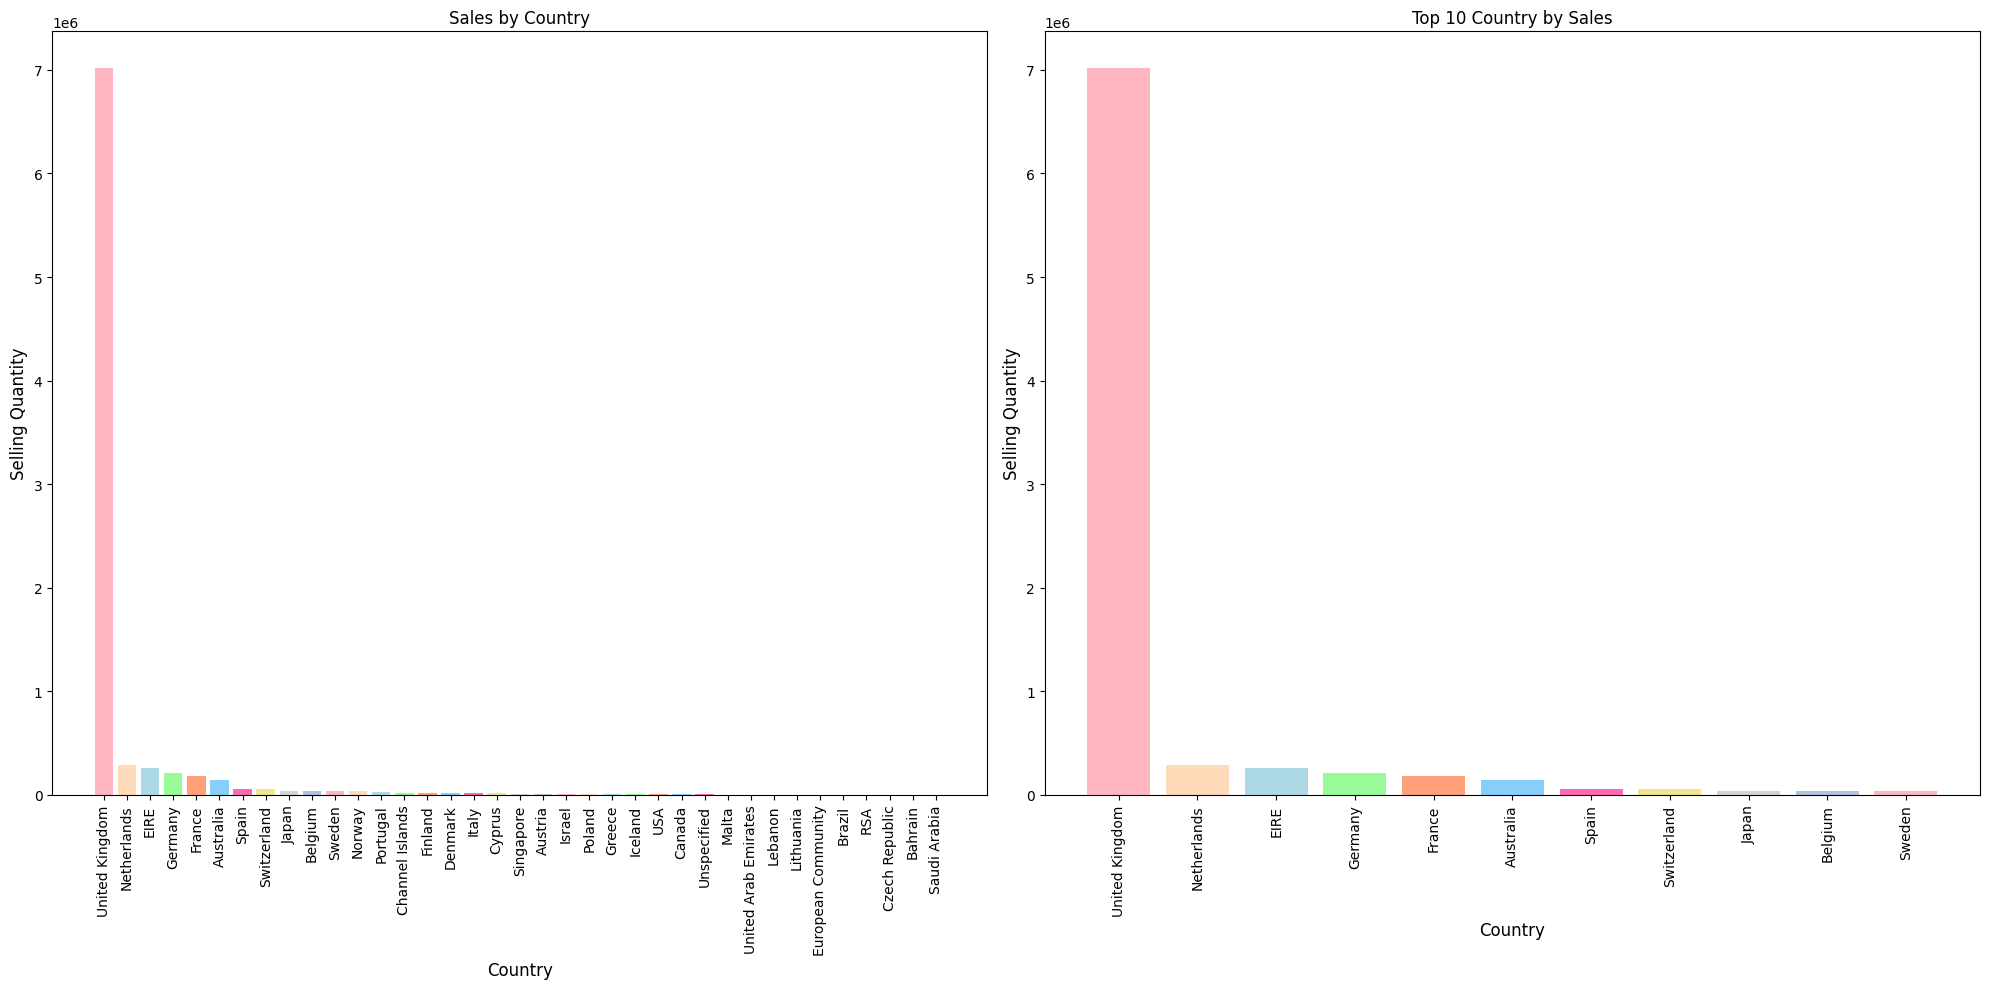

In [31]:
# Raggruppare per Paese e sommare le vendite
top_10_countries = sales_in_the_world.iloc[:11]

# Creare i subplot
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Primo grafico: vendite per paese
axs[0].bar(sales_in_the_world.index, sales_in_the_world.values, color = colors)
axs[0].set_title("Sales by Country")
axs[0].set_xlabel("Country", fontsize=12)
axs[0].set_ylabel("Selling Quantity", fontsize=12)
axs[0].tick_params(axis='x', rotation=90)

# Secondo grafico: top 10 paesi con le vendite più alte
axs[1].bar(top_10_countries.index, top_10_countries.values, color = colors)
axs[1].set_title("Top 10 Country by Sales")
axs[1].set_xlabel("Country", fontsize=12)
axs[1].set_ylabel("Selling Quantity", fontsize=12)
axs[1].tick_params(axis = 'x', rotation=90)

# Aggiungere spazi tra i subplot
plt.tight_layout()

# Mostrare i grafici
plt.show()

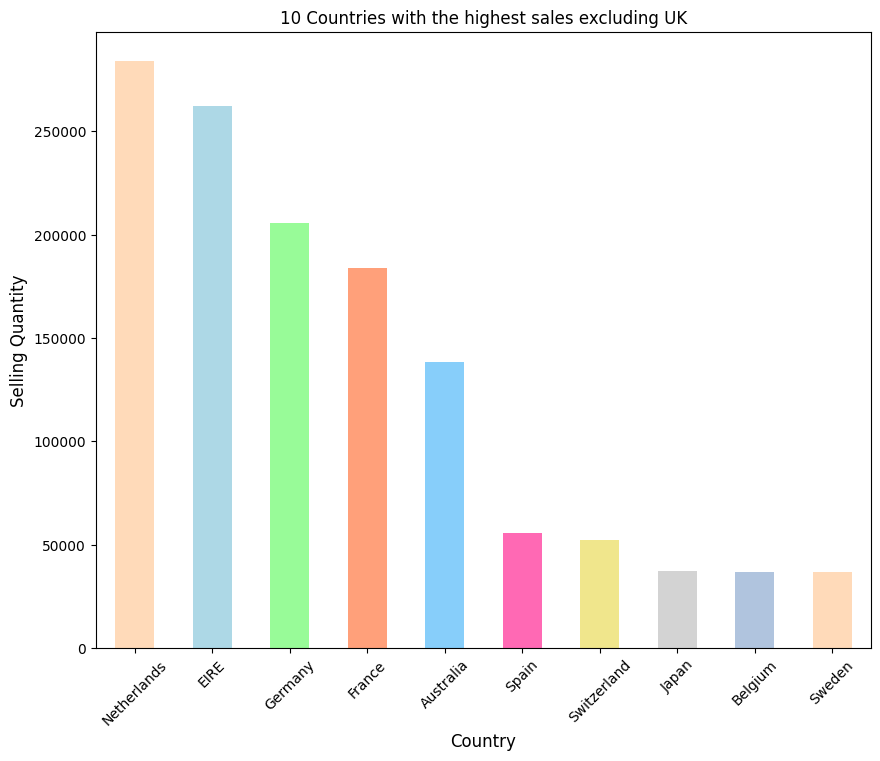

In [32]:
highest_country_sales_excluding_UK = df_sales.groupby("Country")["TotalSales"].sum().nlargest(11)
highest_country_sales_excluding_UK = highest_country_sales_excluding_UK.iloc[1:]

same_colors = colors[1:]
plt.figure(figsize=(10,8))
highest_country_sales_excluding_UK.plot(kind = "bar", color = same_colors)
plt.title("10 Countries with the highest sales excluding UK")
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Selling Quantity", fontsize = 12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-33-102f5de65a63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Quantity', y = 'Description', data = top_products, palette = colors)


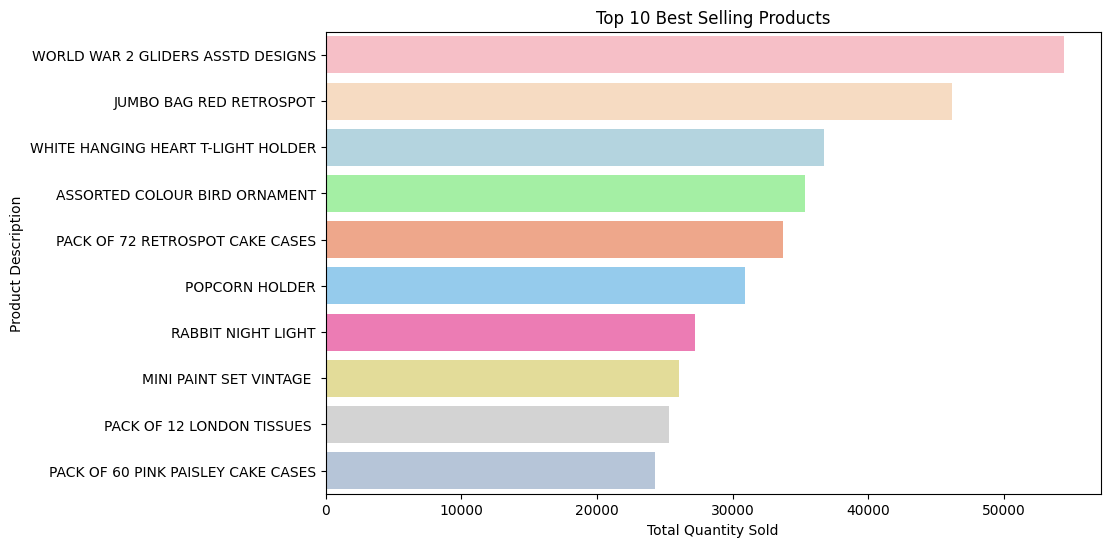

In [33]:
top_products = df_sales.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Quantity', y = 'Description', data = top_products, palette = colors)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top 10 Best Selling Products')
plt.show()

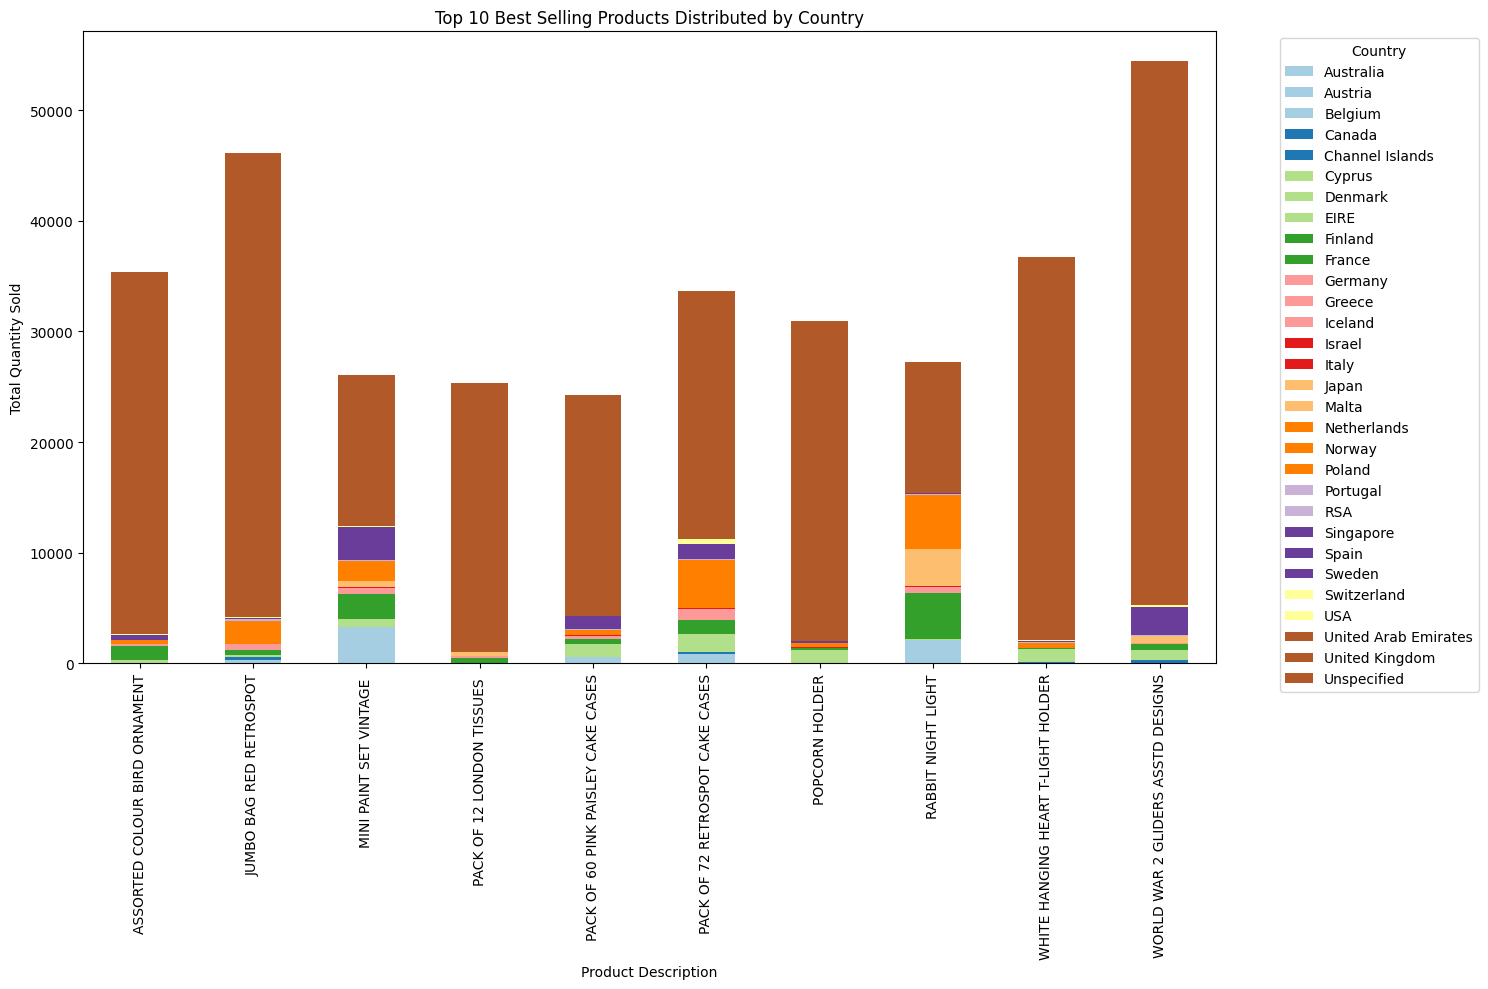

In [34]:
# Ottenere i top 10 prodotti per quantità venduta
filtered_df = df_sales[df_sales['Description'].isin(top_products['Description'])]

grouped = filtered_df.groupby(['Description', 'Country'])['Quantity'].sum().unstack().fillna(0)

# Creare un grafico a barre impilato
grouped.plot(kind='bar', stacked=True, figsize=(15, 10), colormap = 'Paired')

# Impostare i titoli e le etichette
plt.title('Top 10 Best Selling Products Distributed by Country')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

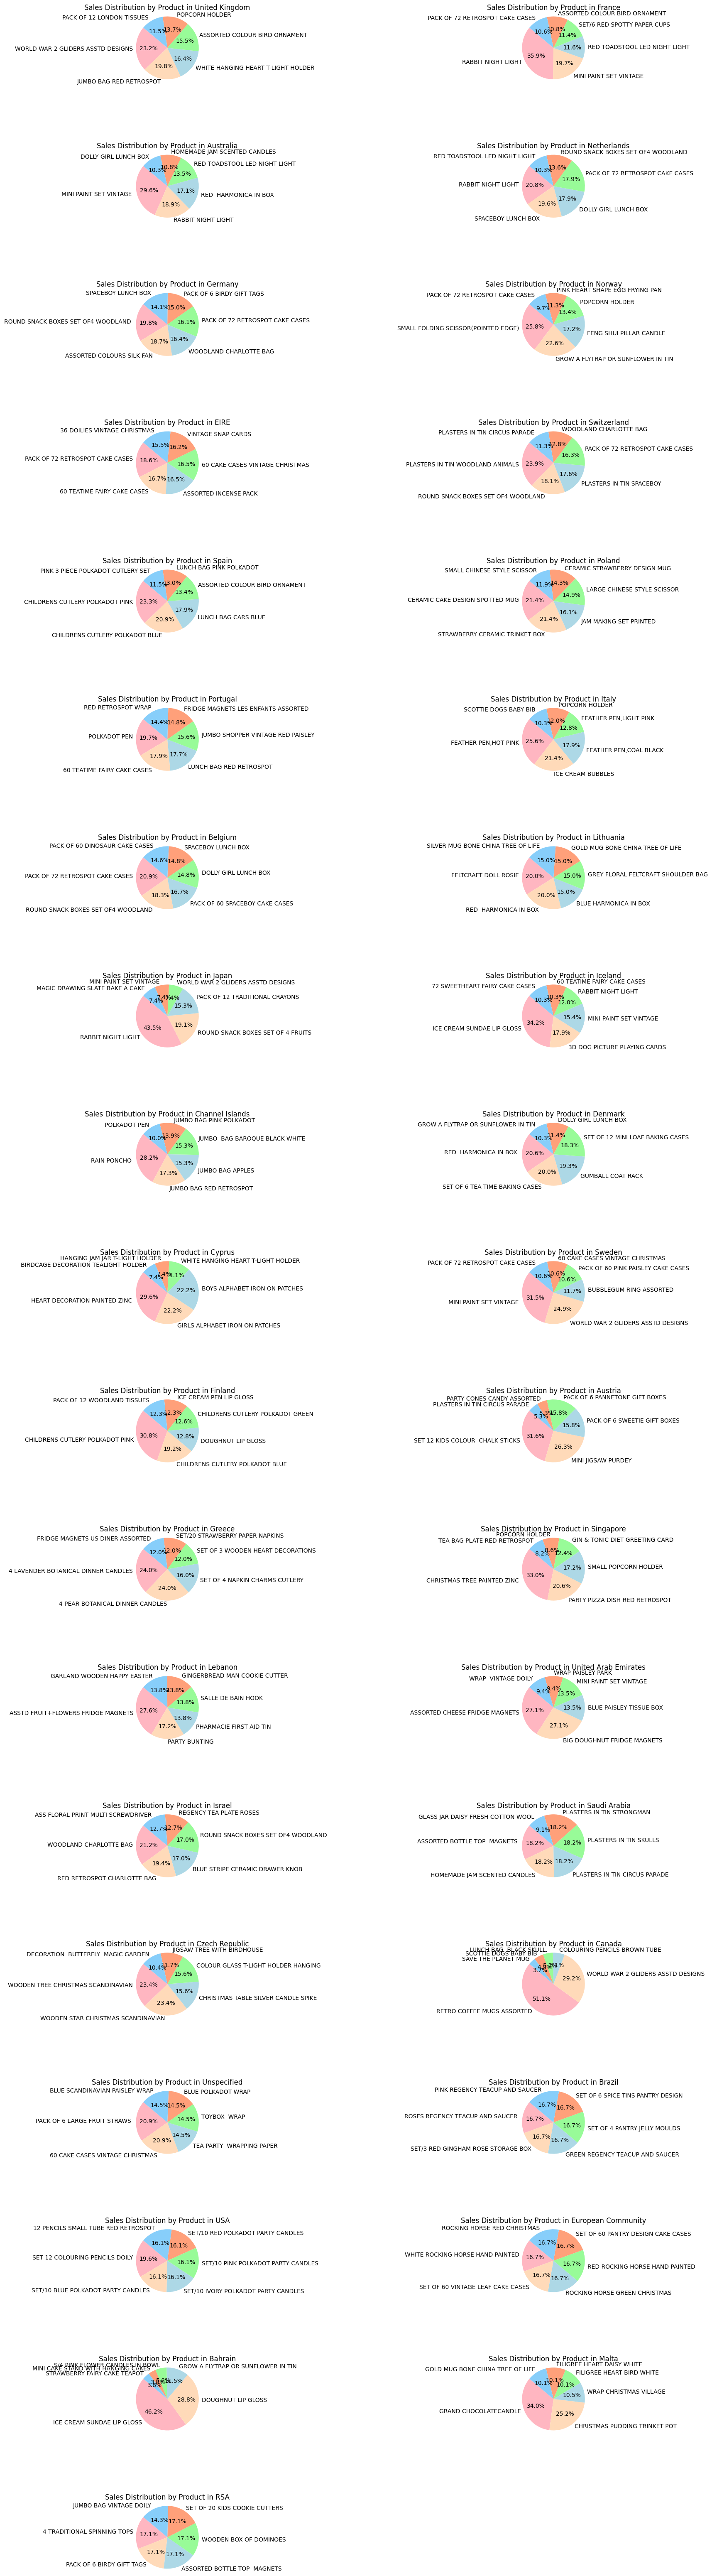

In [35]:
# Lista dei paesi unici
list_of_country = df_sales['Country'].unique()

# Numero di colonne e righe per i subplot
n_cols = 2
n_rows = (len(list_of_country) // n_cols) + 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 80))

# Iterare sui paesi e creare i pie plot
for i, country in enumerate(list_of_country):
    country_data = df_sales[df_sales['Country'] == country]
    product_sales_per_country = country_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
    product_sales_per_country = product_sales_per_country[:6]  # Prendi i primi 6 prodotti

    # Creare il pie plot
    axs.flat[i].pie(product_sales_per_country.values, labels=product_sales_per_country.index, autopct='%1.1f%%', colors=colors, startangle=140)
    axs.flat[i].set_title(f'Sales Distribution by Product in {country}')
    axs.flat[i].axis('equal')  # Assicurarsi che il grafico sia un cerchio

# Rimuovere eventuali subplot vuoti
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs.flat[j])

# Aggiungere spazi tra i subplot
plt.subplots_adjust(wspace=0.5, hspace=1.0)  # Aggiungere spazi orizzontali e verticali tra i subplot

# Mostrare i grafici
plt.show()